In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('credit_risk_dataset.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
data[data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.duplicated().sum()

0

In [9]:
data.dropna(inplace = True )

In [10]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [11]:
# identify the input and target variable 

y = data['loan_status']

x = data[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]


Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [12]:
# split into train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1320)


In [13]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(21375, 11) (21375,)
(7126, 11) (7126,)


**Step - 4: Data preparation on train data:**

- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)

In [14]:
## seperating the Numerical Columns 

x_train_num = x_train[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']]
x_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
23198,32,16800,0.0,5000,14.35,0.30,7
31090,40,69000,21.0,13200,13.24,0.19,14
23647,32,46000,4.0,9000,7.51,0.20,9
14422,23,106000,7.0,10000,7.14,0.09,2
15238,25,125004,0.0,15000,7.88,0.12,3
...,...,...,...,...,...,...,...
11039,26,71046,10.0,6500,10.99,0.09,4
21477,28,20400,12.0,6000,6.03,0.29,8
389,25,160000,5.0,15000,11.14,0.09,4
4006,23,56000,7.0,4000,15.23,0.07,4


In [15]:
## seperating the categorical Columns 

x_train_cat = x_train[['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']]
x_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23198,RENT,PERSONAL,C,Y
31090,MORTGAGE,DEBTCONSOLIDATION,D,Y
23647,RENT,MEDICAL,A,N
14422,MORTGAGE,EDUCATION,A,N
15238,MORTGAGE,HOMEIMPROVEMENT,A,N
...,...,...,...,...
11039,MORTGAGE,DEBTCONSOLIDATION,B,N
21477,RENT,EDUCATION,A,N
389,OWN,VENTURE,B,N
4006,RENT,VENTURE,C,Y


### Data Transformation for Numerical Columns on Train Data¶

In [16]:

from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()


x_train_num_rescale = pd.DataFrame(scalar.fit_transform (x_train_num),columns = x_train_num.columns , index =x_train_num.index )
x_train_num_rescale

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
23198,0.667331,-0.745873,-1.145766,-0.730956,1.022476,1.235183,0.293774
31090,1.926862,0.033309,3.881414,0.568207,0.679129,0.198952,2.024526
23647,0.667331,-0.310008,-0.188208,-0.097218,-1.093280,0.293155,0.788274
14422,-0.749642,0.585603,0.529961,0.061216,-1.207729,-0.743076,-0.942478
15238,-0.434759,0.869273,-1.145766,0.853389,-0.978831,-0.460468,-0.695227
...,...,...,...,...,...,...,...
11039,-0.277318,0.063850,1.248129,-0.493304,-0.016843,-0.743076,-0.447977
21477,0.037565,-0.692136,1.726908,-0.572521,-1.551075,1.140980,0.541024
389,-0.434759,1.391654,0.051182,0.853389,0.029555,-0.743076,-0.447977
4006,-0.749642,-0.160740,0.529961,-0.889390,1.294678,-0.931482,-0.447977


## Data Transformation for Categorical Columns on Train Data

In [17]:
x_train_cat['person_home_ownership'].value_counts()

RENT        10892
MORTGAGE     8786
OWN          1631
OTHER          66
Name: person_home_ownership, dtype: int64

In [18]:
x_train_cat['loan_grade'].value_counts()

A    7031
B    6824
C    4259
D    2404
E     647
F     162
G      48
Name: loan_grade, dtype: int64

In [19]:
x_train_cat['loan_intent'].value_counts()

EDUCATION            4243
MEDICAL              3988
VENTURE              3706
PERSONAL             3643
DEBTCONSOLIDATION    3435
HOMEIMPROVEMENT      2360
Name: loan_intent, dtype: int64

In [20]:
x_train_cat['cb_person_default_on_file'].value_counts()

N    17566
Y     3809
Name: cb_person_default_on_file, dtype: int64

## Appling the OHE for the nominal categorical Columns

In [21]:
x_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21375 entries, 23198 to 23107
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      21375 non-null  object
 1   loan_intent                21375 non-null  object
 2   loan_grade                 21375 non-null  object
 3   cb_person_default_on_file  21375 non-null  object
dtypes: object(4)
memory usage: 835.0+ KB


In [22]:
x_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
23198,RENT,PERSONAL,C,Y
31090,MORTGAGE,DEBTCONSOLIDATION,D,Y
23647,RENT,MEDICAL,A,N
14422,MORTGAGE,EDUCATION,A,N
15238,MORTGAGE,HOMEIMPROVEMENT,A,N
...,...,...,...,...
11039,MORTGAGE,DEBTCONSOLIDATION,B,N
21477,RENT,EDUCATION,A,N
389,OWN,VENTURE,B,N
4006,RENT,VENTURE,C,Y


## Dividing the nominal and odinal Categories

In [23]:
x_train_cat_1 =  x_train_cat['loan_grade']

x_train_cat_2 = x_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [24]:
## appling the OHE for nominal Data

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoding_ = OneHotEncoder(drop='first', min_frequency=2000, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_cat_ohe = pd.DataFrame(encoding_.fit_transform(x_train_cat_2), 
                               columns=encoding_.get_feature_names_out(x_train_cat_2.columns), 
                               index = x_train_cat_2.index)

x_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
23198,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
31090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14422,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
encoding_.categories_

[array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['N', 'Y'], dtype=object)]

In [27]:
## Appling the le for odinal Data

In [28]:
x_train_cat_1.value_counts()

A    7031
B    6824
C    4259
D    2404
E     647
F     162
G      48
Name: loan_grade, dtype: int64

In [29]:
loan_grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5,'B':6,'A':6}

x_train_cat_le = x_train_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

x_train_cat_le.head()

23198    5
31090    4
23647    6
14422    6
15238    6
Name: loan_grade, dtype: int64

In [30]:
## Concating the Numerical , Categorical_OHE,Categorical_LE columns 

In [31]:
x_train_trans = pd.concat([x_train_num_rescale, x_train_cat_ohe,x_train_cat_le], axis=1)
x_train_trans.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
23198,0.667331,-0.745873,-1.145766,-0.730956,1.022476,1.235183,0.293774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
31090,1.926862,0.033309,3.881414,0.568207,0.679129,0.198952,2.024526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
23647,0.667331,-0.310008,-0.188208,-0.097218,-1.093280,0.293155,0.788274,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
14422,-0.749642,0.585603,0.529961,0.061216,-1.207729,-0.743076,-0.942478,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
15238,-0.434759,0.869273,-1.145766,0.853389,-0.978831,-0.460468,-0.695227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6


In [32]:
x_train_trans .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21375 entries, 23198 to 23107
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   person_age                                21375 non-null  float64
 1   person_income                             21375 non-null  float64
 2   person_emp_length                         21375 non-null  float64
 3   loan_amnt                                 21375 non-null  float64
 4   loan_int_rate                             21375 non-null  float64
 5   loan_percent_income                       21375 non-null  float64
 6   cb_person_cred_hist_length                21375 non-null  float64
 7   person_home_ownership_RENT                21375 non-null  float64
 8   person_home_ownership_infrequent_sklearn  21375 non-null  float64
 9   loan_intent_EDUCATION                     21375 non-null  float64
 10  loan_intent_HOMEIMPROVEMENT   

In [33]:
x_train_trans.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
23198,0.667331,-0.745873,-1.145766,-0.730956,1.022476,1.235183,0.293774,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
31090,1.926862,0.033309,3.881414,0.568207,0.679129,0.198952,2.024526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
23647,0.667331,-0.310008,-0.188208,-0.097218,-1.093280,0.293155,0.788274,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
14422,-0.749642,0.585603,0.529961,0.061216,-1.207729,-0.743076,-0.942478,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
15238,-0.434759,0.869273,-1.145766,0.853389,-0.978831,-0.460468,-0.695227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6


# Data Transformation on  Test Data 

In [35]:
x_test

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
26371,29,100000,OWN,0.0,VENTURE,B,15800,11.14,0.16,N,6
17578,25,41000,RENT,3.0,PERSONAL,B,8000,10.99,0.20,N,2
7027,26,51000,MORTGAGE,2.0,DEBTCONSOLIDATION,A,12000,6.17,0.24,N,4
23211,31,20000,RENT,0.0,MEDICAL,C,5000,13.80,0.25,N,5
21027,30,44000,RENT,1.0,EDUCATION,B,8500,11.36,0.19,N,7
...,...,...,...,...,...,...,...,...,...,...,...
11057,21,71688,MORTGAGE,2.0,EDUCATION,D,7500,13.17,0.10,Y,4
6781,26,22884,RENT,2.0,MEDICAL,A,7000,7.51,0.31,N,4
31223,36,81000,MORTGAGE,9.0,HOMEIMPROVEMENT,C,6000,12.99,0.07,N,17
26345,27,100000,RENT,7.0,MEDICAL,B,14000,10.62,0.14,N,8


In [36]:
x_test_cat_1 = x_test['loan_grade']
x_test_cat_2 = x_test[['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [39]:
# Applying the le for Odinal Data 

In [44]:
loan_grade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5,'B':6,'A':6}

x_test_cat_le = x_test['loan_grade'].apply(lambda x: loan_grade_encoder[x])
x_test_cat_le.head()

26371    6
17578    6
7027     6
23211    5
21027    6
Name: loan_grade, dtype: int64

In [45]:
# Appling the OHE for Nominal Data 

In [47]:
x_test_cat_ohe = pd.DataFrame(encoding_.transform(x_test_cat_2),
                             columns =encoding_.get_feature_names_out(x_train_cat_2.columns), 
                              index = x_test.index)
x_test_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
26371,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
17578,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23211,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21027,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
## Data Transformation on Numerical Data  person_home_ownership

In [49]:
x_test_num = x_test[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']]
x_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26371,29,100000,0.0,15800,11.14,0.16,6
17578,25,41000,3.0,8000,10.99,0.20,2
7027,26,51000,2.0,12000,6.17,0.24,4
23211,31,20000,0.0,5000,13.80,0.25,5
21027,30,44000,1.0,8500,11.36,0.19,7
...,...,...,...,...,...,...,...
11057,21,71688,2.0,7500,13.17,0.10,4
6781,26,22884,2.0,7000,7.51,0.31,4
31223,36,81000,9.0,6000,12.99,0.07,17
26345,27,100000,7.0,14000,10.62,0.14,8


In [50]:
x_test_num_rescale = pd.DataFrame(scalar.transform (x_test_num),columns = x_test_num.columns , index =x_test_num.index )
x_test_num_rescale

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
26371,0.195006,0.496042,-1.145766,0.980136,0.029555,-0.083656,0.046524
17578,-0.434759,-0.384643,-0.427597,-0.255652,-0.016843,0.293155,-0.942478
7027,-0.277318,-0.235374,-0.666987,0.378085,-1.507770,0.669966,-0.447977
23211,0.509889,-0.698107,-1.145766,-0.730956,0.852349,0.764169,-0.200727
21027,0.352448,-0.339862,-0.906376,-0.176435,0.097606,0.198952,0.293774
...,...,...,...,...,...,...,...
11057,-1.064525,0.073433,-0.666987,-0.334870,0.657477,-0.648873,-0.447977
6781,-0.277318,-0.655058,-0.666987,-0.414087,-1.093280,1.329385,-0.447977
31223,1.297096,0.212432,1.008740,-0.572521,0.601799,-0.931482,2.766277
26345,-0.119876,0.496042,0.529961,0.694954,-0.131292,-0.272062,0.541024


In [52]:
## Concating the x_test numerical,categorical data 

In [53]:
x_test_trans = pd.concat([x_test_num_rescale,x_test_cat_ohe,x_test_cat_le],axis = 1)
x_test_trans.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
26371,0.195006,0.496042,-1.145766,0.980136,0.029555,-0.083656,0.046524,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
17578,-0.434759,-0.384643,-0.427597,-0.255652,-0.016843,0.293155,-0.942478,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
7027,-0.277318,-0.235374,-0.666987,0.378085,-1.507770,0.669966,-0.447977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
23211,0.509889,-0.698107,-1.145766,-0.730956,0.852349,0.764169,-0.200727,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5
21027,0.352448,-0.339862,-0.906376,-0.176435,0.097606,0.198952,0.293774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6


## **Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:**
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest

## Applying KNN Algorithm 


In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_trans, y_train)

KNeighborsClassifier()

In [55]:
y_test_pred_knn = classifier.predict(x_test_trans)

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

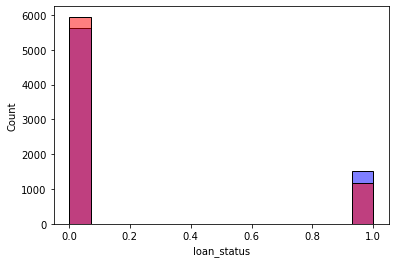

In [56]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_knn, color='red', alpha=0.5)

In [57]:
from sklearn.metrics import accuracy_score
print('accuracy_score: ', accuracy_score(y_test, y_test_pred_knn))

accuracy_score:  0.8937692955374684


# Apply Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression 
regressor = LogisticRegression()
regressor.fit(x_train_trans, y_train)

LogisticRegression()

In [59]:
y_test_pred_lg = regressor.predict(x_test_trans)

In [60]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_lg})

temp_data.head()

,Actual,Predicted
26371,0,0
17578,0,0
7027,0,0
23211,0,1
21027,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

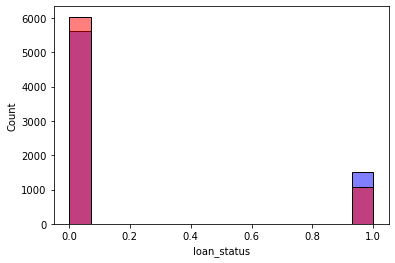

In [61]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_lg, color='red', alpha=0.5)

In [62]:
from sklearn.metrics import accuracy_score
print('accuracy_score: ', accuracy_score(y_test, y_test_pred_lg))

accuracy_score:  0.8617737861352792


## Apply Support Vector Machine

In [68]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(x_train_trans, y_train)

SVC()

In [69]:
y_test_pred_svm = SVM.predict(x_test_trans)

In [70]:
temp_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_svm})

temp_data.head()

,Actual,Predicted
26371,0,0
17578,0,0
7027,0,0
23211,0,1
21027,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

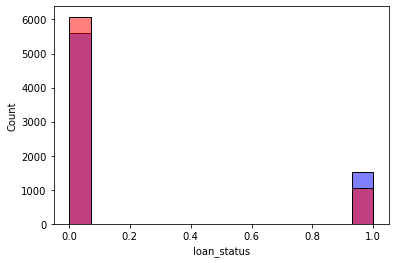

In [71]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_svm, color='red', alpha=0.5)

In [72]:
print('accuracy_score: ', accuracy_score(y_test, y_test_pred_svm))

accuracy_score:  0.8979792309851249


## Apply Decision Tree 

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_trans, y_train)

DecisionTreeClassifier()

In [74]:
y_test_pred_dt = dt.predict(x_test_trans)

In [75]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_dt})

temp_df.head()

,Actual,Predicted
26371,0,0
17578,0,0
7027,0,0
23211,0,1
21027,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

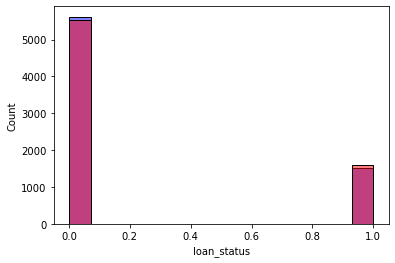

In [76]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_dt, color='red', alpha=0.5)

In [77]:
print('accuracy_score: ', accuracy_score(y_test, y_test_pred_dt))

accuracy_score:  0.8948919449901768


## Appliing Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train_trans, y_train)

RandomForestClassifier()

In [79]:
y_test_pred_rf = dt.predict(x_test_trans)

In [80]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_rf})

temp_df.head()

,Actual,Predicted
26371,0,0
17578,0,0
7027,0,0
23211,0,1
21027,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

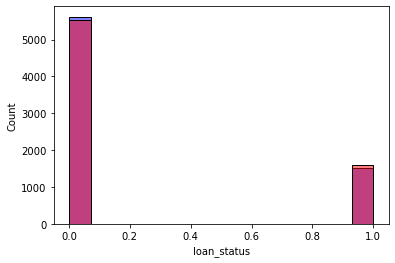

In [81]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred_rf, color='red', alpha=0.5)

In [82]:
print('accuracy_score: ', accuracy_score(y_test, y_test_pred_rf))

accuracy_score:  0.8948919449901768


### SVM Gives the Acuuracy Of 89.7 so this is the best model